# Introduction to Regression

- Regression is a statistical method used to model the relationship between a dependent variable y and independent variable x.
- It is a Supervised machine learning technique used to predict continuous values.
- It is easiest and one of the most widely used machine learning algorithms.
- Regression analysis helps to understand how the value of a dependent variable changes corresponding to an independent variable.
- Using this technique we are predicts continuous or real values such as:
    - Temperature
    - Age
    - Salary
    - Price etc...
- Regression algorithms plot a best-fit line or a curve between the data.

**The line showing the relationship betwwn dependent and independent variables is called a regression line**

- It is predict the 2 types of relationship:
    - Positive linear relationship.
    - Negative linear relationship.
    
### Positive linear relationship:
   - In this case, the dependent vaiable increases on the Y-axis and the independent variable increases on the X-axis.
    
### Negative linear relationship:
   - In this case, the dependent vaiable decreases on the Y-axis and the independent variable increases on the X-axis.
    

## Application of Regression
### 1. Oil and Gas Industry
- Linear and nonlinear regression models are used to forecast global oil production.
- Regression analysis was used to influence factors on the future economy of crude oil.
### 2. Predicting Events
- Regression models are greatly used to predict the events that have yet to occures.
- Predicts the number of people who will pass a particular billboard

## Types of Regression
Here is some types of Regression that is used in the machine learning:

- Linear regression
- Polynomial regression
- Support vector regression
- Decision tree regression
- Random forest regression
- Ridge regression
- Lasso regression
- Logistic regression
   
### Linear Regression:
- It is a popular modeling technique which is used to predicts a continuous dependent variable based on a independent variable
- It is used least square criterion for estimation and Applied only if there is a linear relationship between the variables

### Polynomial Regression: 
- Polynomial regression is a form of linear regression, it is stabilished the relationship between an independent variabl x and a dependent variable y is modeled as an **nth** degree polynomial

### Support Vector Regression:
- Support vector machine regression(SVR) is a supervised learning algorithm.
- It aims to create the maximum data points within the boundry lines and the hyperplane
- This can be used to solve both regression and classification problems

### Decision Tree Regression:
- Decision Tree regression is a commonly used supervised learning approach
- It is builds a tree-like structure, in the tree there are 3 main concepts-
    - Internal nodes represent the "test" for an attribute.
    - Branches represent test results.
    - Leaf nodes represent the final result or decision.
    
### Random Forest Regression:
- Random forest regression is an ensemble learning method that uses bagging or bootstrap aggregation techniques.
- This method combines multiple decision trees to predict the final output.
- Aggregated decision trees run in parallel and do not interact with each other.

### Ridge Regression:
- It is used when dealing with multicollinearity data.
- The least squares are unbiased, and variances are large in the case of Ridge regression.
- The predicted values will vary from the actual values.

### Lasso Regression:
- Lasso regression is also a form of linear regression Lasso means(**Least Absolute Shrinkage and Selection Operator**)
- Lasso shrinkage to perform variable selection or feature selection
- 

# Linear Regression

In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets

In [2]:
from sklearn.datasets import fetch_california_housing
housing= fetch_california_housing()

In [3]:
housing_df = pd.DataFrame(data = housing.data, columns=housing.feature_names)
housing_df['HousePrice'] = housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
# checking for missing values
housing_df.isna().sum() # if all the values is 0 then your data is correct and there is no missing value in you data

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
HousePrice    0
dtype: int64

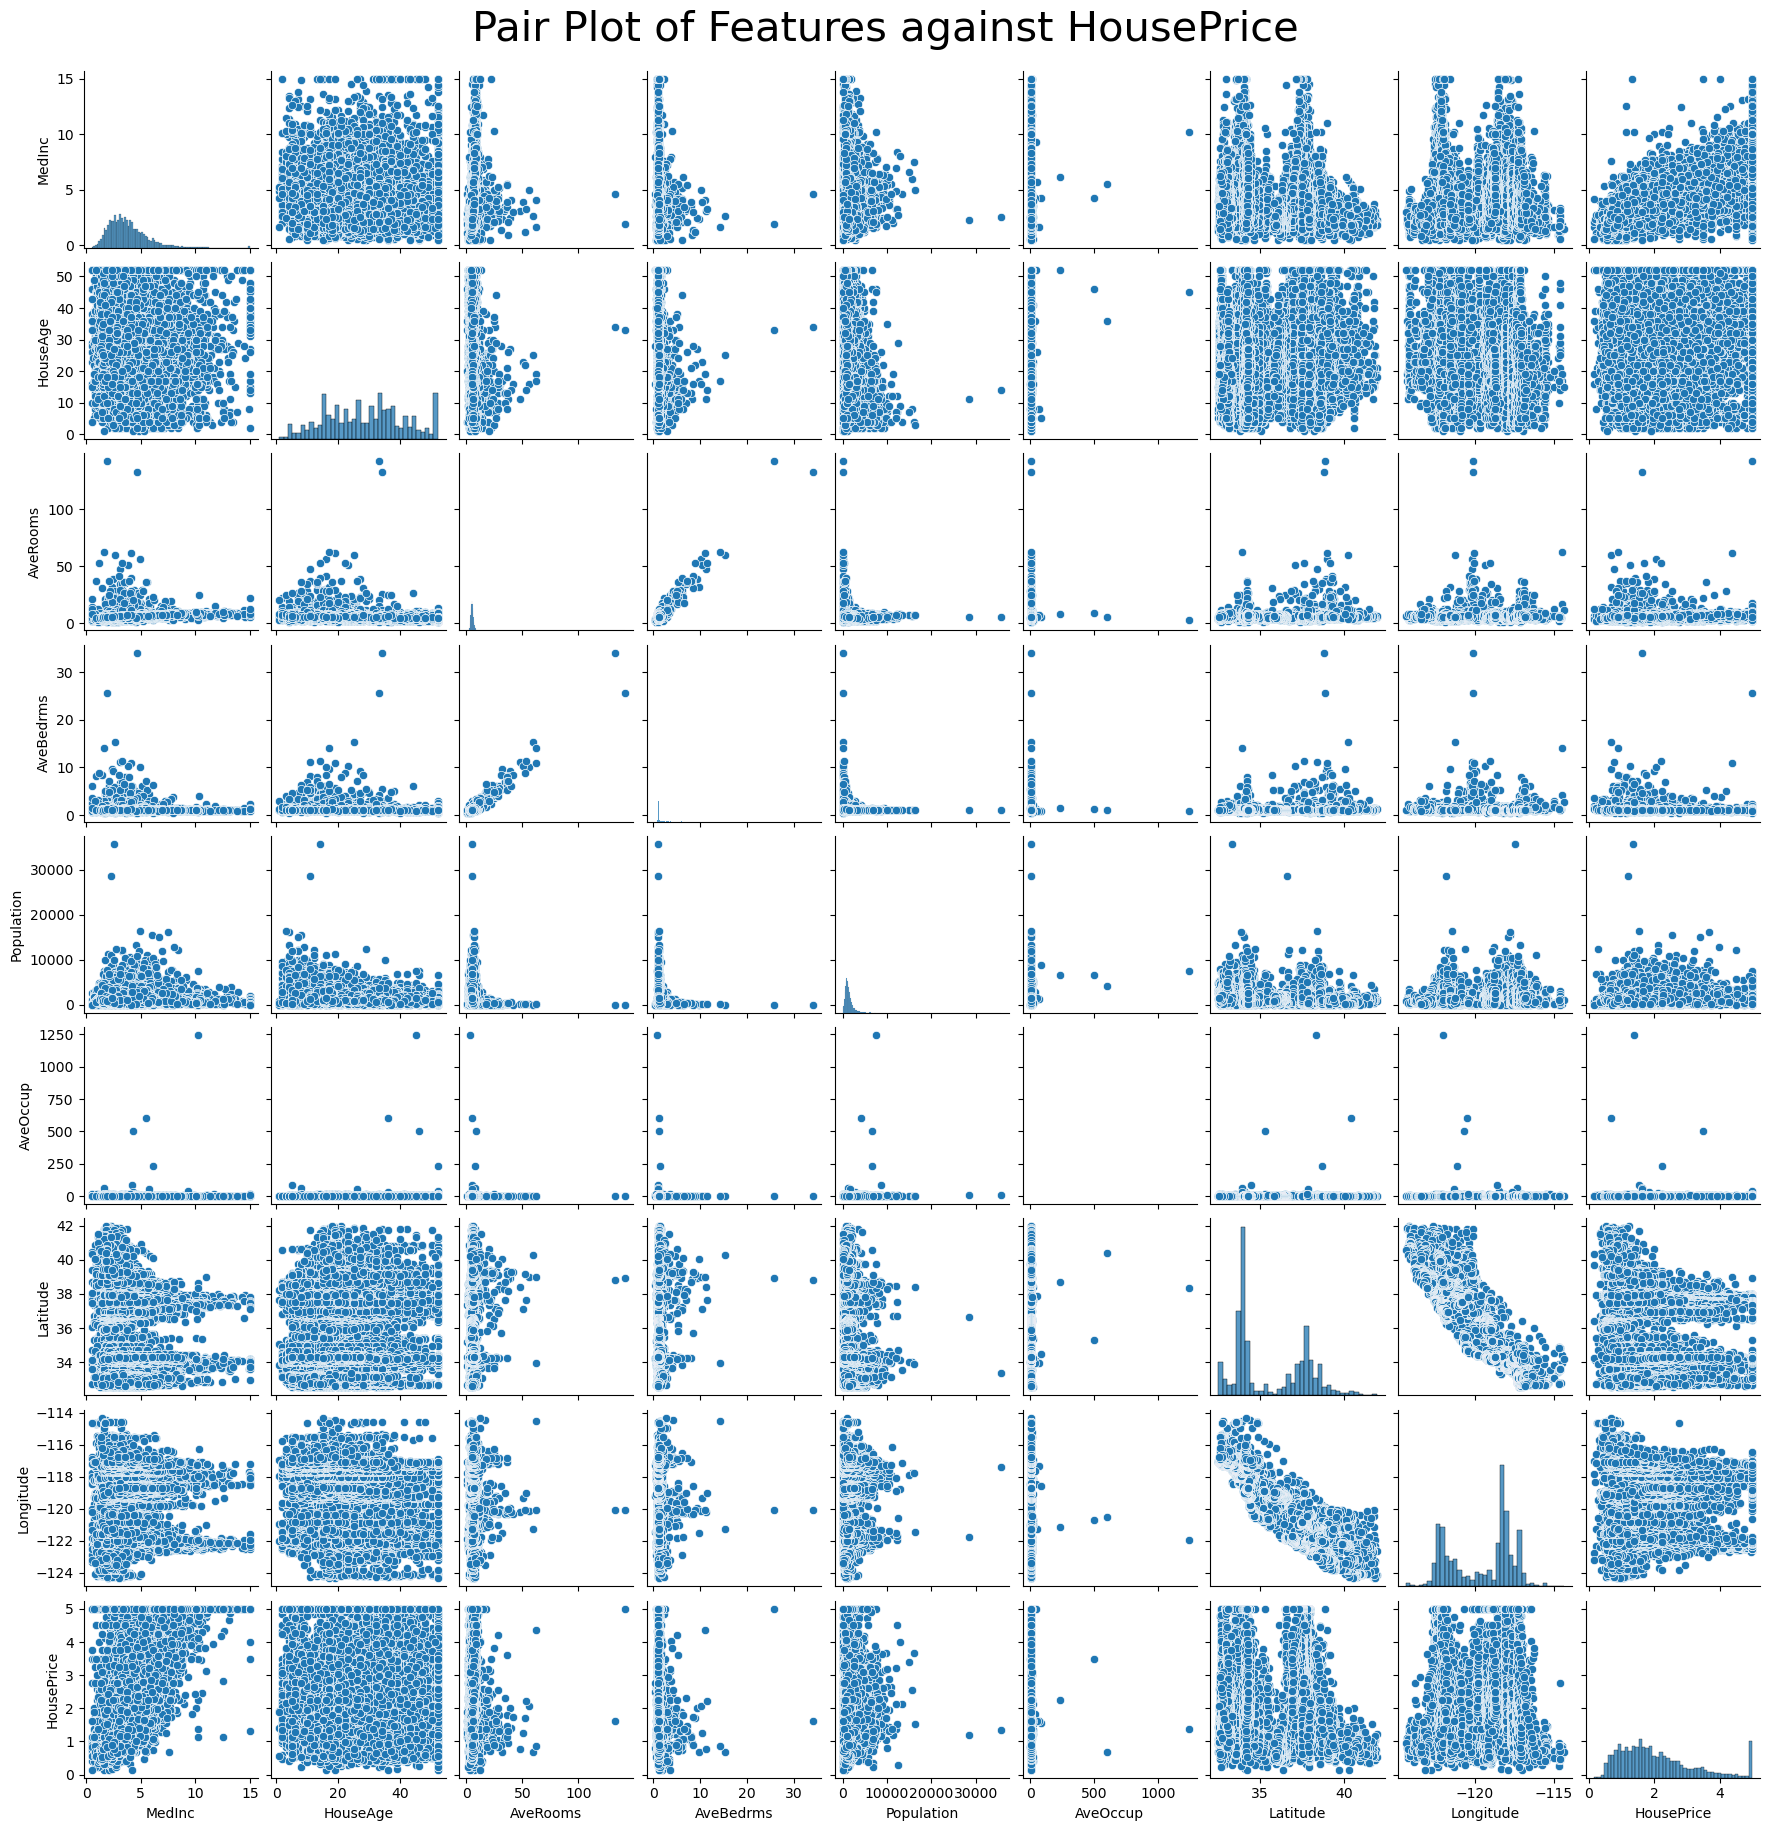

In [6]:
sns.pairplot(housing_df, height=2)
plt.suptitle('Pair Plot of Features against HousePrice', y = 1.02, size = 30)
plt.show()

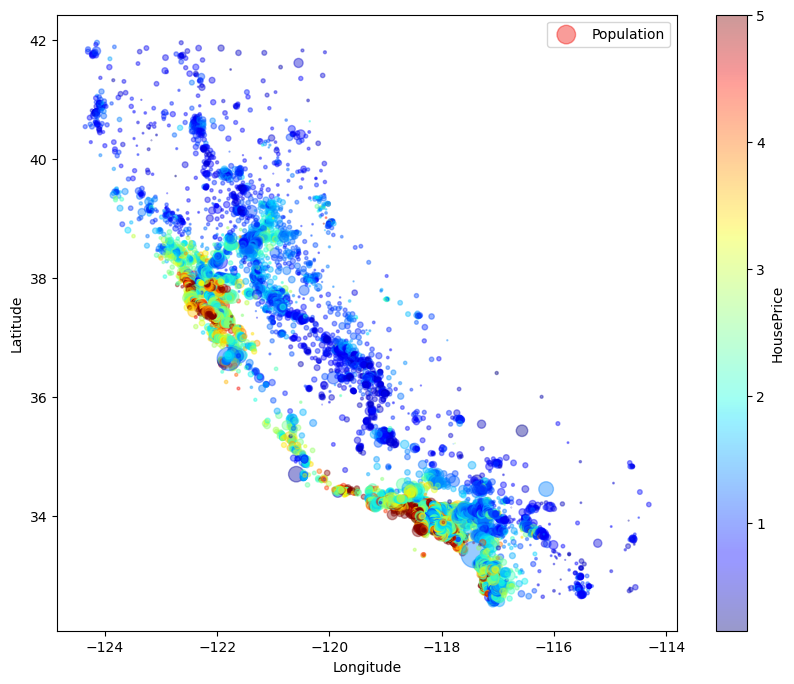

In [7]:
housing_df.plot(
kind = 'scatter', 
x = 'Longitude', 
y = 'Latitude', 
alpha = 0.4, 
s = housing_df['Population']/100,
label = 'Population',
c = 'HousePrice',
cmap = 'jet',
colorbar = True, 
figsize = (10,8))

plt.show()

Text(0.5, 1.0, 'correlation coefficients between Housing related variables')

<Figure size 1000x800 with 0 Axes>

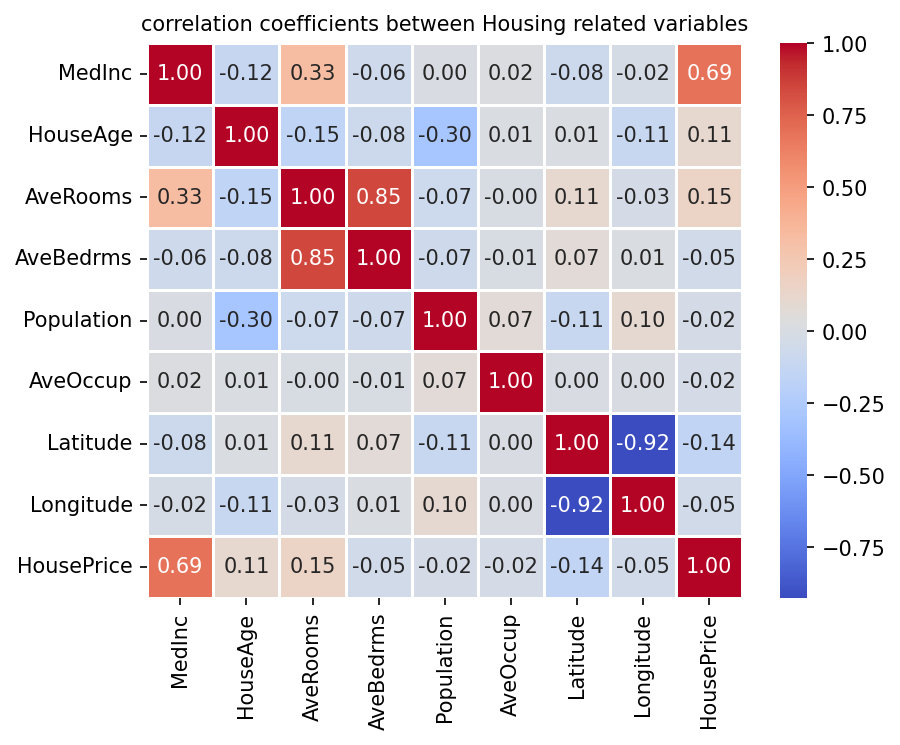

In [8]:
corr = housing_df.corr()
plt.figure(figsize = (10,8))
plt.subplots(dpi= 150)
sns.heatmap(corr, annot=True, cmap = 'coolwarm', fmt = '0.2f', linewidths=0.6)
plt.title("correlation coefficients between Housing related variables", size = 10)

In [9]:
corr['HousePrice'].abs().sort_values(ascending = False)

HousePrice    1.000000
MedInc        0.688075
AveRooms      0.151948
Latitude      0.144160
HouseAge      0.105623
AveBedrms     0.046701
Longitude     0.045967
Population    0.024650
AveOccup      0.023737
Name: HousePrice, dtype: float64

<Figure size 800x600 with 0 Axes>

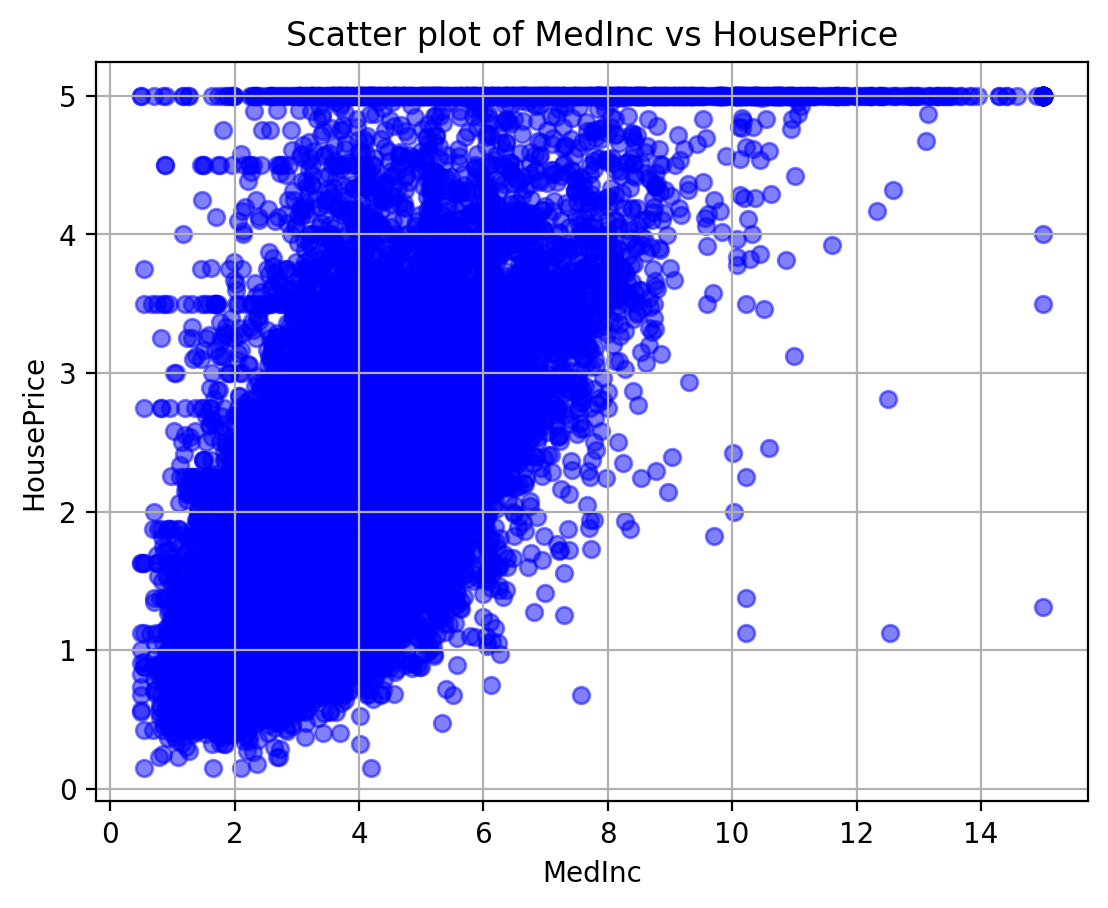

In [10]:
medinc = housing_df['MedInc']
houseprice = housing_df['HousePrice']

plt.figure(figsize = (8,6))
plt.subplots(dpi = 200)
plt.scatter(medinc, houseprice, alpha=0.5, color = 'blue')
plt.title('Scatter plot of MedInc vs HousePrice')
plt.xlabel('MedInc')
plt.ylabel('HousePrice')
plt.grid(True)
plt.show()

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

housing_df_vif= housing_df.drop('HousePrice', axis = 1)
housing_df_vif= housing_df_vif.apply(pd.to_numeric, errors = 'coerce')

vif_data = pd.DataFrame()
vif_data['Feature'] = housing_df_vif.columns
vif_data['VIF'] = [variance_inflation_factor(housing_df_vif.values, i) for i in range(len(housing_df_vif.columns))]
print(vif_data)

      Feature         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


In [14]:
housing_df = housing_df.drop(['Latitude', 'Longitude'], axis = 1)

In [ ]:
cols_to_convert = ['MedInc', 'HouseAge', 'AveRoom', 'AveBedrms', 'Population', 'AveOccup']
housing_df[cols_to_convert] = pd.to_numeric(housing_df)

